## Одиночный гармонический сигнал

Исходный сигнал

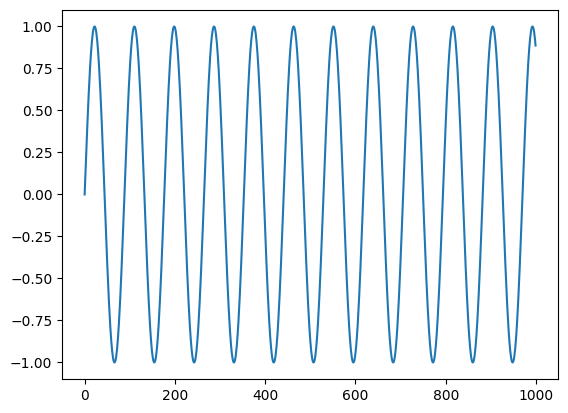

In [38]:
import numpy as np
from matplotlib import pyplot as plt


RATE = 44100
DURATION = 5

def generate_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    y = np.sin(2 * np.pi * frequencies)
    return x, y

_, initial_tone = generate_wave(500, RATE, DURATION)

plt.plot(initial_tone[:1000])
plt.show()

Спектр исходного сигнала

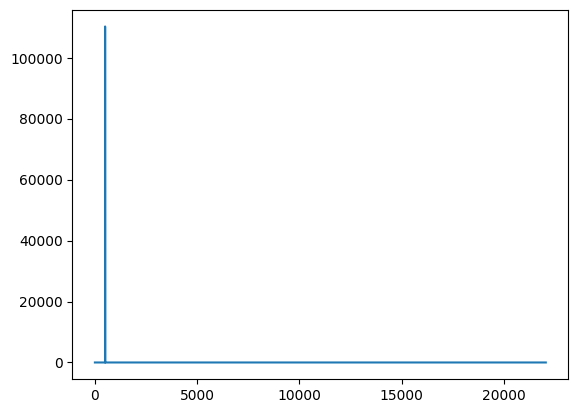

In [39]:
from scipy.fft import rfft, rfftfreq


N = RATE * DURATION

yf = rfft(initial_tone)
xf = rfftfreq(N, 1 / RATE)

plt.plot(xf, np.abs(yf))
plt.show()

Добавление шума

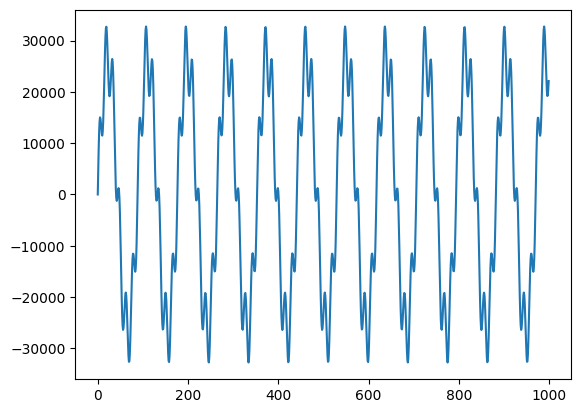

In [44]:
NOISE_FREQUENCY = 3000

_, noise_tone = generate_wave(NOISE_FREQUENCY, RATE, DURATION)
noise_tone = noise_tone * 0.25
output_tone = initial_tone + noise_tone

normalized_noise_tone = np.int16((output_tone / output_tone.max()) * 32767)

plt.plot(normalized_noise_tone[:1000])
plt.show()

Спектр сигнала с шумом

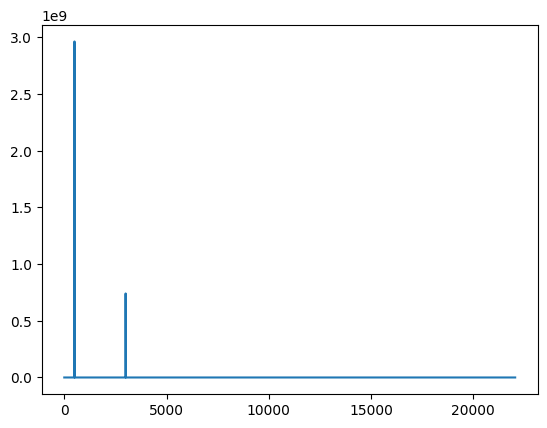

In [45]:
yf = rfft(normalized_noise_tone)
xf = rfftfreq(N, 1 / RATE)

plt.plot(xf, np.abs(yf))
plt.show()

Удаление шума

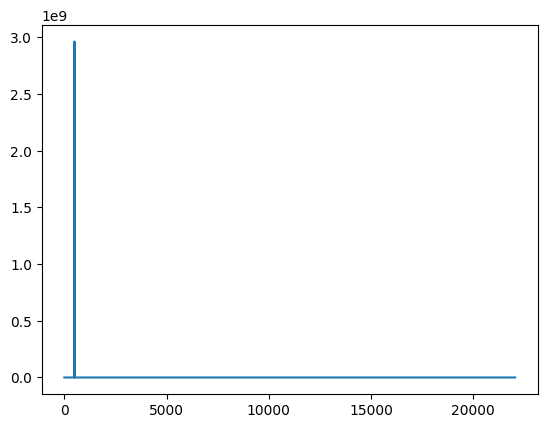

In [46]:
points_per_freq = len(xf) / (RATE / 2)

target_idx = int(points_per_freq * NOISE_FREQUENCY)
yf[target_idx - 2:target_idx + 2] = 0

plt.plot(xf, np.abs(yf))
plt.show()

Обратное преобразование

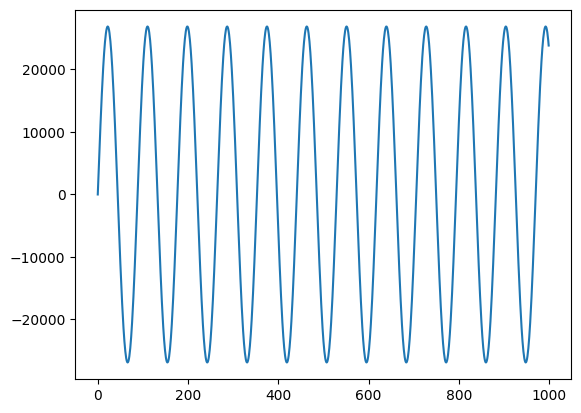

In [47]:
from scipy.fft import irfft


new_signal = irfft(yf)

plt.plot(new_signal[:1000])
plt.show()

## Три гармонических сигнала

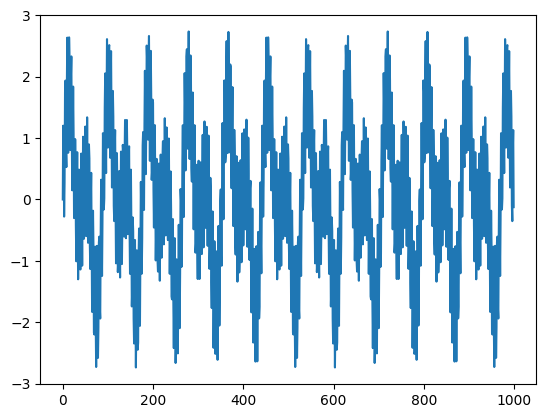

In [52]:
_, tone_1 = generate_wave(500, RATE, DURATION)
_, tone_2 = generate_wave(1000, RATE, DURATION)
_, tone_3 = generate_wave(10000, RATE, DURATION)
initial_tone = tone_1 + tone_2 + tone_3

plt.plot(initial_tone[:1000])
plt.show()

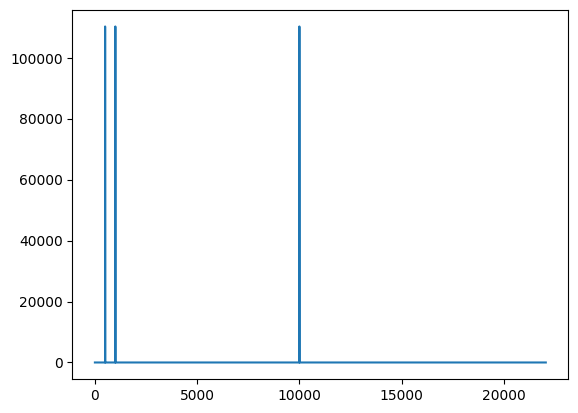

In [53]:
yf = rfft(initial_tone)
xf = rfftfreq(N, 1 / RATE)

plt.plot(xf, np.abs(yf))
plt.show()

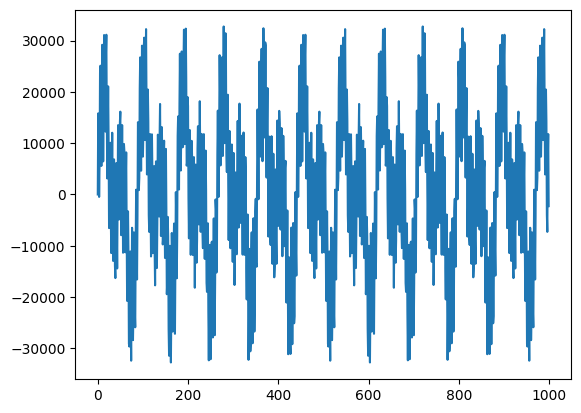

In [54]:
_, noise_tone = generate_wave(NOISE_FREQUENCY, RATE, DURATION)
noise_tone = noise_tone * 0.25
output_tone = initial_tone + noise_tone

normalized_noise_tone = np.int16((output_tone / output_tone.max()) * 32767)

plt.plot(normalized_noise_tone[:1000])
plt.show()

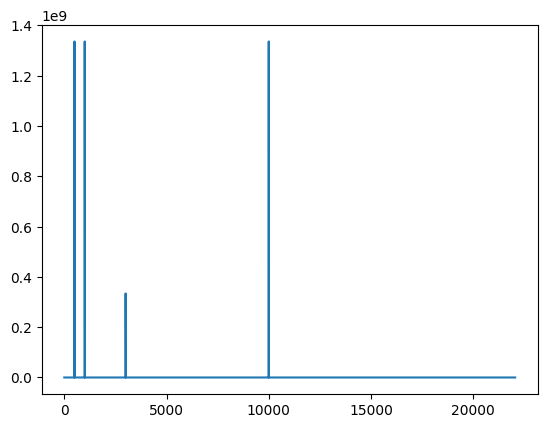

In [55]:
yf = rfft(normalized_noise_tone)
xf = rfftfreq(N, 1 / RATE)

plt.plot(xf, np.abs(yf))
plt.show()

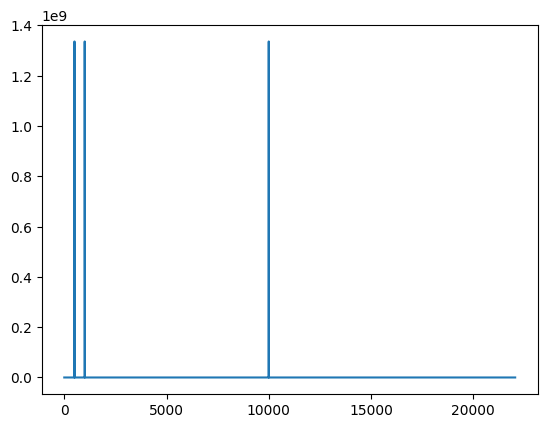

In [56]:
points_per_freq = len(xf) / (RATE / 2)

target_idx = int(points_per_freq * NOISE_FREQUENCY)
yf[target_idx - 2:target_idx + 2] = 0

plt.plot(xf, np.abs(yf))
plt.show()

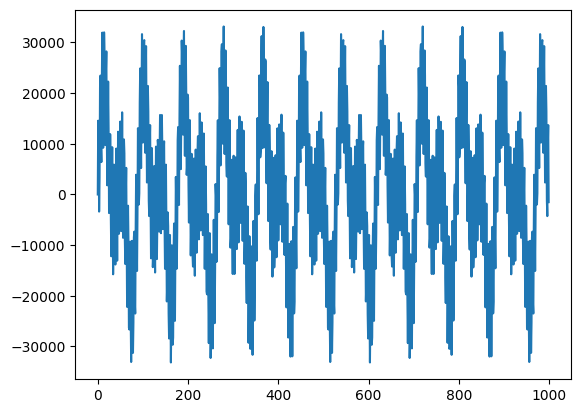

In [57]:
new_signal = irfft(yf)

plt.plot(new_signal[:1000])
plt.show()